# Sonoran Desert: CMIP6 projections
#### Groundwater recharge in 2050
Groundwater recharge in 2025, 2050, 2075 and 2100 for the climate scenarios SSP1-2.6, SSP2-4.5 and SSP5-8.5. The camel that is used for this notebook is: hysets_09488650

In [33]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

import matplotlib.pyplot as plt
from cartopy import crs
from cartopy import feature as cfeature
import fiona
import shapely.geometry
from pyproj import Geod
from rich import print
import pandas as pd
import xarray as xr

import ewatercycle.forcing
import ewatercycle.models
import ewatercycle.parameter_sets

### Setting up the model
Location of the groundwater recharge: Gila river near Yuma & ...

In [34]:
station_latitude = 32.71555556
station_longitude = -114.533386

Loading the parameter set and forcing set. Setting up the PCR-GlobWB model. 

In [3]:
parameter_set = ewatercycle.parameter_sets.ParameterSet(
    name="custom_parameter_set",
    directory= "/data/shared/parameter-sets/pcrglobwb_global",
    config="./pcrglobwb_sonoran_ERA5_05min.ini",
    target_model="pcrglobwb",
    supported_model_versions={"setters"},
)

In [4]:
forcing126 = ewatercycle.forcing.sources["PCRGlobWBForcing"].load(
    directory="/home/emol/forcing/sonoran_desert_CMIP_SSP126/work/diagnostic/script",
)

In [5]:
pcrglob126 = ewatercycle.models.PCRGlobWB(
    parameter_set=parameter_set,
    forcing=forcing126
)

Starting and initializing the model

In [6]:
#start_time = "2025-01-01T00:00:00Z"
#end_time = "2025-12-31T00:00:00Z"

cfg_file126, cfg_dir126 = pcrglob126.setup(
    end_time="2050-12-31T00:00:00Z",
    max_spinups_in_years=0
)
cfg_file126, cfg_dir126

('/home/emol/repos/projects/book/thesis_projects/BSc/2024_Q2_ElineMol_CEG/Deliverables/pcrglobwb_20250107_191623/pcrglobwb_ewatercycle.ini',
 '/home/emol/repos/projects/book/thesis_projects/BSc/2024_Q2_ElineMol_CEG/Deliverables/pcrglobwb_20250107_191623')

In [7]:
pcrglob126.initialize(cfg_file126)

Running the model

In [8]:
time126 = pd.date_range(pcrglob126.start_time_as_isostr, pcrglob126.end_time_as_isostr)
timeseries126 = pd.DataFrame(
    index=pd.Index(time126, name="time"), columns=["PCRGlobWB: Sonoran Desert"]
)

In [9]:
while pcrglob126.time < pcrglob126.end_time:
    pcrglob126.update()

    # Track discharge at station location
    discharge_at_station126 = pcrglob126.get_value_at_coords(
        "groundwater_recharge", lat=[station_latitude], lon=[station_longitude]
    )
    time126 = pcrglob126.time_as_isostr
    timeseries126["PCRGlobWB: Sonoran Desert"][time126] = discharge_at_station126[0]

    # Show progress
    #print(time126,end='\r')  # "\r" clears the output before printing the next timestamp


<Axes: xlabel='time'>

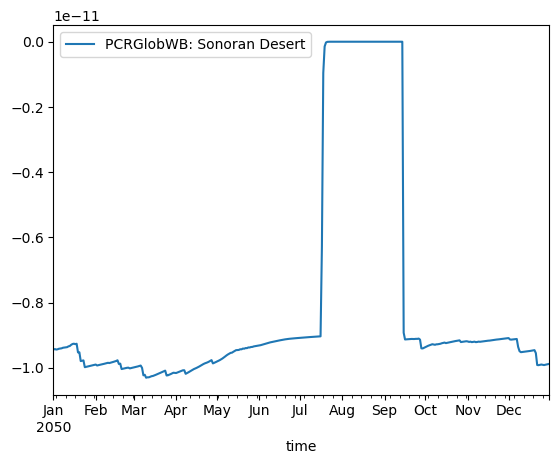

In [10]:
timeseries126.plot()

### Results
Graph of the groundwater recharge in 2025

In [ ]:
da126 = pcrglob126.get_value_as_xarray("groundwater_recharge")

In [ ]:
fig126 = plt.figure(dpi=120)
ax126 = fig126.add_subplot(111, projection=crs.PlateCarree())
da126.plot(ax=ax126, cmap="GnBu")

# Overlay ocean and coastines
ax126.add_feature(cfeature.OCEAN)
ax126.add_feature(cfeature.RIVERS, color="k")
ax126.coastlines()

# Add a red cross marker at specified location near the Gila River
ax126.scatter(station_longitude, station_latitude, s=250, c="r", marker="x", lw=2)
ax126.set_title("Sonoran Desert SSP1-2.6", fontsize=12);

### Now for SSP4-6.0
First, set up the forcing that will be used in the model.

In [11]:
parameter_set = ewatercycle.parameter_sets.ParameterSet(
    name="custom_parameter_set",
    directory= "/data/shared/parameter-sets/pcrglobwb_global",
    config="./pcrglobwb_sonoran_ERA5_05min.ini",
    target_model="pcrglobwb",
    supported_model_versions={"setters"},
)

In [12]:
forcing245 = ewatercycle.forcing.sources["PCRGlobWBForcing"].load(
    directory="/home/emol/forcing/sonoran_desert_CMIP_SSP245/work/diagnostic/script",
)

In [13]:
pcrglob245 = ewatercycle.models.PCRGlobWB(
    parameter_set=parameter_set,
    forcing=forcing245
)

In [14]:
#start_time = "2025-01-01T00:00:00Z"
#end_time = "2025-12-31T00:00:00Z"

cfg_file245, cfg_dir245 = pcrglob245.setup(
    end_time="2050-12-31T00:00:00Z",
    max_spinups_in_years=0
)
cfg_file245, cfg_dir245

('/home/emol/repos/projects/book/thesis_projects/BSc/2024_Q2_ElineMol_CEG/Deliverables/pcrglobwb_20250107_194756/pcrglobwb_ewatercycle.ini',
 '/home/emol/repos/projects/book/thesis_projects/BSc/2024_Q2_ElineMol_CEG/Deliverables/pcrglobwb_20250107_194756')

In [15]:
pcrglob245.initialize(cfg_file245)

In [16]:
time245 = pd.date_range(pcrglob245.start_time_as_isostr, pcrglob245.end_time_as_isostr)
timeseries245 = pd.DataFrame(
    index=pd.Index(time245, name="time"), columns=["PCRGlobWB: Sonoran Desert"]
)

In [17]:
while pcrglob245.time < pcrglob245.end_time:
    pcrglob245.update()

    # Track discharge at station location
    discharge_at_station245 = pcrglob245.get_value_at_coords(
        "groundwater_recharge", lat=[station_latitude], lon=[station_longitude]
    )
    time245 = pcrglob245.time_as_isostr
    timeseries245["PCRGlobWB: Sonoran Desert"][time245] = discharge_at_station245[0]

    # Show progress
    #print(time245,end='\r')  # "\r" clears the output before printing the next timestamp


<Axes: xlabel='time'>

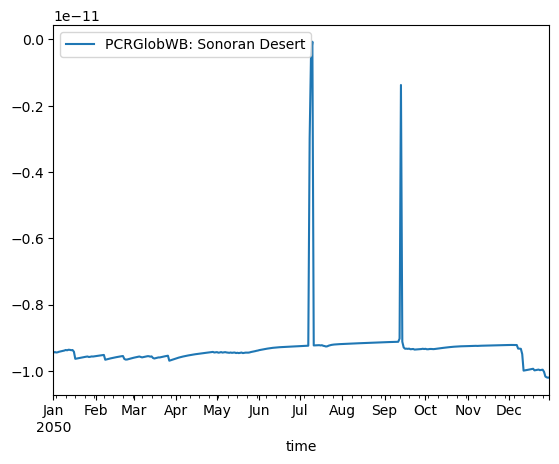

In [27]:
timeseries245.plot()

Now the model can be used. A map is made to show the location of the ... for SSP4-6.0.

In [ ]:
da245 = pcrglob245.get_value_as_xarray("groundwater_recharge")

In [ ]:
fig245 = plt.figure(dpi=120)
ax245 = fig245.add_subplot(111, projection=crs.PlateCarree())
da245.plot(ax=ax245, cmap="GnBu")

# Overlay ocean and coastines
ax245.add_feature(cfeature.OCEAN)
ax245.add_feature(cfeature.RIVERS, color="k")
ax245.coastlines()

# Add a red cross marker at specified location near the Gila River
ax245.scatter(station_longitude, station_latitude, s=250, c="r", marker="x", lw=2)
ax245.set_title("Sonoran Desert SSP2-4.5", fontsize=12);

### Now for SSP5-8.5
First, set up the forcing.

In [35]:
parameter_set = ewatercycle.parameter_sets.ParameterSet(
    name="custom_parameter_set",
    directory= "/data/shared/parameter-sets/pcrglobwb_global",
    config="./pcrglobwb_sonoran_ERA5_05min.ini",
    target_model="pcrglobwb",
    supported_model_versions={"setters"},
)
#print(parameter_set)

In [36]:
forcing585 = ewatercycle.forcing.sources["PCRGlobWBForcing"].load(
    directory="/home/emol/forcing/sonoran_desert_CMIP_SSP585/work/diagnostic/script",
)
#print(forcing)

In [37]:
pcrglob585 = ewatercycle.models.PCRGlobWB(
    parameter_set=parameter_set,
    forcing=forcing585
)

In [38]:
#start_time = "2025-01-01T00:00:00Z"
#end_time = "2025-12-31T00:00:00Z"

cfg_file585, cfg_dir585 = pcrglob585.setup(
    end_time="2050-12-31T00:00:00Z",
    max_spinups_in_years=0
)
cfg_file585, cfg_dir585

('/home/emol/repos/projects/book/thesis_projects/BSc/2024_Q2_ElineMol_CEG/Deliverables/pcrglobwb_20250108_101123/pcrglobwb_ewatercycle.ini',
 '/home/emol/repos/projects/book/thesis_projects/BSc/2024_Q2_ElineMol_CEG/Deliverables/pcrglobwb_20250108_101123')

In [39]:
pcrglob585.initialize(cfg_file585)

In [40]:
time585 = pd.date_range(pcrglob585.start_time_as_isostr, pcrglob585.end_time_as_isostr)
timeseries585 = pd.DataFrame(
    index=pd.Index(time585, name="time"), columns=["PCRGlobWB: Sonoran Desert"]
)

In [41]:
while pcrglob585.time < pcrglob585.end_time:
    pcrglob585.update()

    # Track discharge at station location
    discharge_at_station585 = pcrglob585.get_value_at_coords(
        "groundwater_recharge", lat=[station_latitude], lon=[station_longitude]
    )
    time585 = pcrglob585.time_as_isostr
    timeseries585["PCRGlobWB: Sonoran Desert"][time585] = discharge_at_station585[0]

    # Show progress
    #print(time585,end='\r')  # "\r" clears the output before printing the next timestamp


<Axes: xlabel='time'>

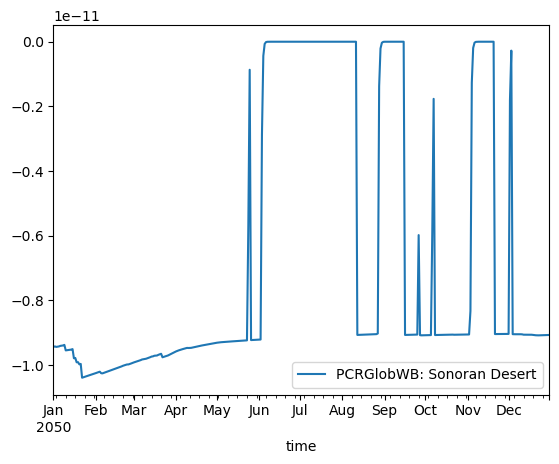

In [42]:
timeseries585.plot()

Now the model can be used. A map is made to show the location of the ... for SSP5-8.5.

In [ ]:
da585 = pcrglob585.get_value_as_xarray("groundwater_recharge")

In [ ]:
fig585 = plt.figure(dpi=120)
ax585 = fig585.add_subplot(111, projection=crs.PlateCarree())
da585.plot(ax=ax585, cmap="GnBu")

# Overlay ocean and coastines
ax585.add_feature(cfeature.OCEAN)
ax585.add_feature(cfeature.RIVERS, color="k")
ax585.coastlines()

# Add a red cross marker at specified location near the Gila River
ax585.scatter(station_longitude, station_latitude, s=250, c="r", marker="x", lw=2)
ax585.set_title("Sonoran Desert SSP5-8.5", fontsize=12);

### Plotting the timeseries

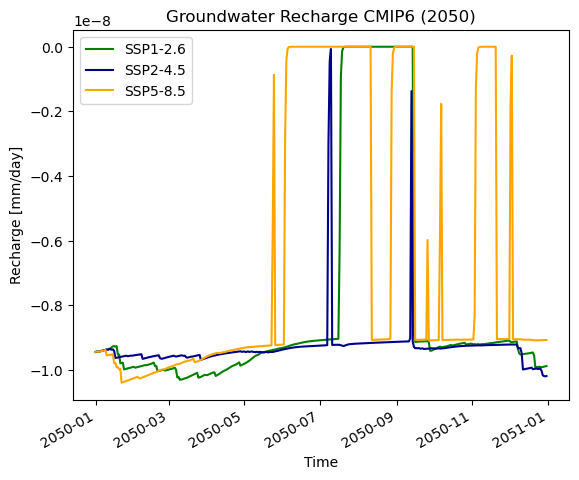

In [45]:
plt.plot(timeseries126*1000, label="SSP1-2.6", color="green")
plt.plot(timeseries245*1000, label="SSP2-4.5", color="darkblue")
plt.plot(timeseries585*1000, label="SSP5-8.5", color="orange")

plt.title("Groundwater Recharge CMIP6 (2050)")
plt.xlabel("Time")
plt.ylabel("Recharge [mm/day]")
plt.xticks(rotation=30, ha='right')
plt.legend(loc=2);

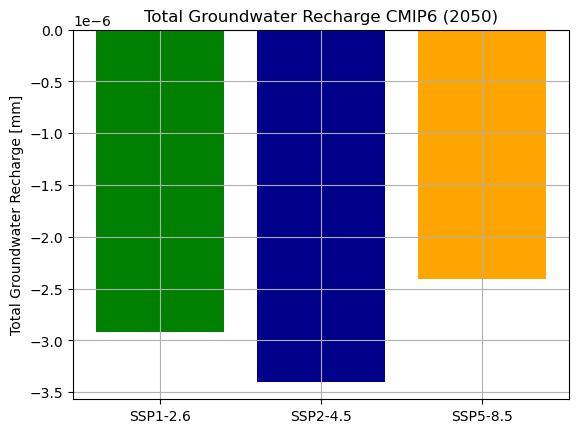

In [46]:
total_126 = timeseries126.sum() * 1000 
total_245 = timeseries245.sum() * 1000 
total_585 = timeseries585.sum() * 1000 

categories = ["SSP1-2.6", "SSP2-4.5", "SSP5-8.5"]
totals = [total_126, total_245, total_585]
colors = ["green", "darkblue", "orange"]

for i in range(len(totals)):
    plt.bar(categories[i], totals[i], color=colors[i])

plt.title("Total Groundwater Recharge CMIP6 (2050)")
plt.ylabel("Total Groundwater Recharge [mm]")
plt.grid()

In [47]:
pcrglob126.finalize()
pcrglob245.finalize()
pcrglob585.finalize()

_InactiveRpcError: <_InactiveRpcError of RPC that terminated with:
	status = StatusCode.UNAVAILABLE
	details = "failed to connect to all addresses; last error: UNKNOWN: ipv4:192.168.0.108:47375: Failed to connect to remote host: Connection refused"
	debug_error_string = "UNKNOWN:Error received from peer  {grpc_message:"failed to connect to all addresses; last error: UNKNOWN: ipv4:192.168.0.108:47375: Failed to connect to remote host: Connection refused", grpc_status:14, created_time:"2025-01-08T11:31:01.031595807+01:00"}"
>